In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
#EXP4. Comparing it with COVID-19 specific repos

In [3]:
df = pd.read_csv('Covid-19 repo.csv')
df.head()

,1,Adds,Subs,Date
0,1581206400,13549,-10213,2020-02-09
1,1581811200,8296,-7308,2020-02-16
2,1582416000,7530,-4554,2020-02-23
3,1583020800,11295,-12380,2020-03-01
4,1583625600,20046,-17739,2020-03-08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       111 non-null    int64 
 1   Adds    111 non-null    int64 
 2   Subs    111 non-null    int64 
 3   Date    111 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.6+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

              1    Adds    Subs       Date
0    1581206400   13549  -10213 2020-02-09
1    1581811200    8296   -7308 2020-02-16
2    1582416000    7530   -4554 2020-02-23
3    1583020800   11295  -12380 2020-03-01
4    1583625600   20046  -17739 2020-03-08
..          ...     ...     ...        ...
106  1645315200  120424  -91617 2022-02-20
107  1645920000  126064  -97225 2022-02-27
108  1646524800  220223 -191616 2022-03-06
109  1647129600  138950 -110119 2022-03-13
110  1647734400   70600  -46058 2022-03-20

[111 rows x 4 columns]

1                int64
Adds             int64
Subs             int64
Date    datetime64[ns]
dtype: object


In [6]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

1       179206214400
Adds        12813987
Subs        -9819073
dtype: int64


C:\Users\Jahnavi Jaitly\AppData\Local\Temp\ipykernel_15704\295290147.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_of_cols=df.sum(axis=0)


In [7]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import datetime
from datetime import datetime,timedelta
#from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [8]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')

In [9]:
df['Date']

0     2020-02-09
1     2020-02-16
2     2020-02-23
3     2020-03-01
4     2020-03-08
         ...    
106   2022-02-20
107   2022-02-27
108   2022-03-06
109   2022-03-13
110   2022-03-20
Name: Date, Length: 111, dtype: datetime64[ns]

In [10]:
commit_date= df['Date']
Adds_repo= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

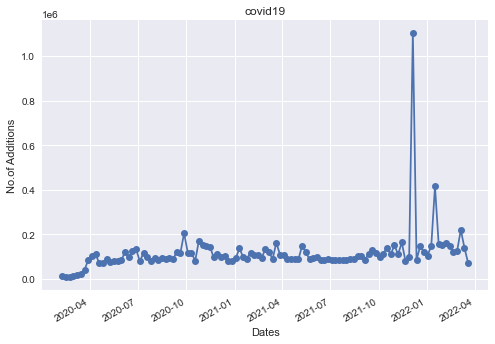

In [12]:
plt.style.use('seaborn')
plt.plot_date(commit_date,Adds_repo,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('covid19')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout

In [13]:
df = pd.read_csv('who.csv')
df.head()

,Weeks,Adds,Subs,Year,Date
0,1601164800,17712,-14464,2020,2020-09-27
1,1601769600,15950,-15942,2020,2020-10-04
2,1602374400,10878,-10878,2020,2020-10-11
3,1602979200,10848,-10847,2020,2020-10-18
4,1603584000,21532,-21531,2020,2020-10-25


In [14]:
sum_of_cols=df.sum(axis=0)
print(sum_of_cols)

Weeks                                         128355408000
Adds                                               1759972
Subs                                              -1753021
Year                                                159658
Date     2020-09-272020-10-042020-10-112020-10-182020-1...
dtype: object


In [15]:
Adds_by_year_who = df.groupby(['Adds'])['Year'].sum().reset_index().sort_values('Adds', ascending=False)
Adds_by_year_who.head(10)

,Adds,Year
78,31232,2020
77,30608,2020
76,30110,2020
75,29733,2020
74,29645,2020
73,29474,2020
72,29196,2020
71,27544,2021
70,27522,2021
69,27490,2021


Text(0.5, 0, 'Year')

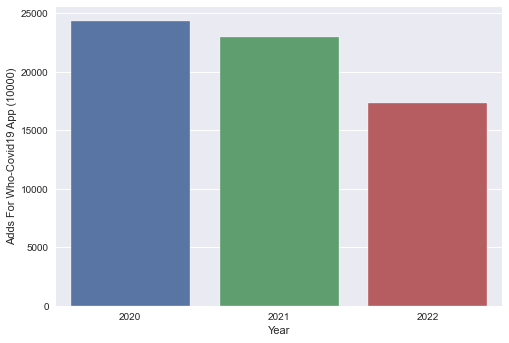

In [17]:
plot_annual_pr = sns.barplot(data=Adds_by_year_who.query('Year < 2023 & Year > 2018'),x='Year',y='Adds',ci=None)
plot_annual_pr.set_ylabel('Adds For Who-Covid19 App (10000)')
plot_annual_pr.set_xlabel('Year')

In [18]:
df['Date']=pd.to_datetime(df['Date'])
print(df)
print()
print(df.dtypes)

         Weeks   Adds   Subs  Year       Date
0   1601164800  17712 -14464  2020 2020-09-27
1   1601769600  15950 -15942  2020 2020-10-04
2   1602374400  10878 -10878  2020 2020-10-11
3   1602979200  10848 -10847  2020 2020-10-18
4   1603584000  21532 -21531  2020 2020-10-25
..         ...    ...    ...   ...        ...
74  1645920000  17783 -17783  2022 2022-02-27
75  1646524800  18352 -18351  2022 2022-03-06
76  1647129600  17892 -17892  2022 2022-03-13
77  1647734400  17418 -17418  2022 2022-03-20
78  1648339200   2994  -2994  2022 2022-03-27

[79 rows x 5 columns]

Weeks             int64
Adds              int64
Subs              int64
Year              int64
Date     datetime64[ns]
dtype: object


In [22]:
commit_date_who= df['Date']
Adds_repo_who= df['Adds']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

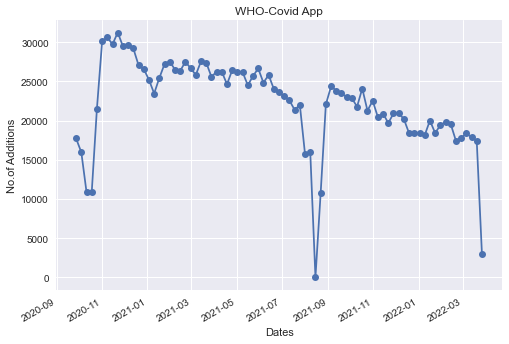

In [20]:
plt.style.use('seaborn')
plt.plot_date(commit_date_who,Adds_repo_who,linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('WHO-Covid App')
plt.xlabel('Dates')
plt.ylabel('No.of Additions')
plt.tight_layout